In [28]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [29]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [30]:
# Display basic information about the dataset
print("Dataset Preview:")
print(data.head())
print("\nDataset Description:")
print(data.describe())

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Description:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000

In [31]:
# Data Cleaning: Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [32]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Testing k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

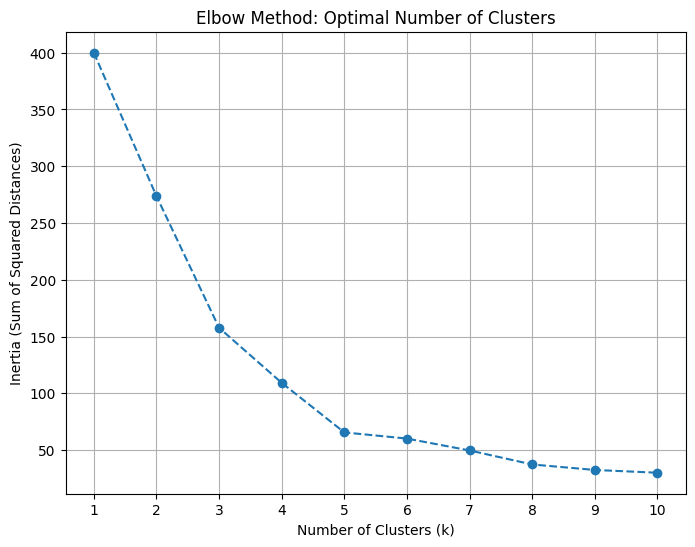

In [33]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_range)
plt.grid()
plt.show()

In [34]:
# Optimal k (based on the Elbow Method)
optimal_k = 5  # Update based on your observation from the elbow plot
print(f"\nOptimal number of clusters (k) chosen: {optimal_k}")


Optimal number of clusters (k) chosen: 5


In [35]:
# Applying K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

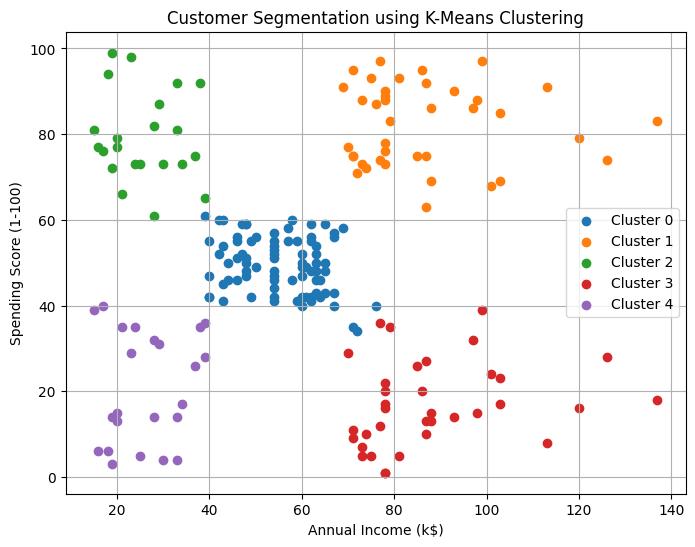

In [36]:
# Visualizing the Clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f"Cluster {cluster}") 

plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()  
plt.grid()
plt.show()

In [37]:
# Analyzing the Clusters
print("\nCluster Centroids:")
centroids = kmeans.cluster_centers_
print(centroids)


Cluster Centroids:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [38]:
# Add insights: Label clusters based on their characteristics
cluster_analysis = {
    0: "Low income, Low spending",
    1: "High income, High spending",
    2: "Average income, Moderate spending",
    3: "Low income, High spending",
    4: "High income, Moderate spending",
}
data['Segment'] = data['Cluster'].map(cluster_analysis)

print("\nCluster Analysis:")
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'Segment']].head())


Cluster Analysis:
   Annual Income (k$)  Spending Score (1-100)  Cluster  \
0                  15                      39        4   
1                  15                      81        2   
2                  16                       6        4   
3                  16                      77        2   
4                  17                      40        4   

                             Segment  
0     High income, Moderate spending  
1  Average income, Moderate spending  
2     High income, Moderate spending  
3  Average income, Moderate spending  
4     High income, Moderate spending  


In [39]:
# Save the labeled dataset for future use
data.to_csv("Clustered_Customers.csv", index=False)
print("\nClustered data saved to 'Clustered_Customers.csv'")


Clustered data saved to 'Clustered_Customers.csv'
